<h2> <b> Logistic Modelling of Economic Data: The Growth of IBM



```
Vraj Gandhi       - 202201425
Kaushik Prajapati - 202201472
```



<p align='justify'>
This project models the historical growth of IBM using logistic functions, based on real-world data from 1914 to 2006. Two datasets were used:
<ul>
  <li><code>growth_ibm.txt</code>: Contains annual revenue(measured in millions of dollars), employee count, and year index.</li>
  <li><code>profit_ibm.txt</code>: Contains year index and net annual profit.</li>
</ul>
The analysis is guided by the paper <em>"The Logistic Dynamics of a Company"</em>, which introduces the theoretical background and modeling approach. The goal is to reproduce and improve the original plots (Figs. 3–6) from the paper, which illustrate IBM’s revenue and human resource growth trends.

Key steps include:
<ul>
  <li>Understanding the logistic growth model from the paper's Section I.</li>
  <li>Reproducing and refining the original plots using Python (Matplotlib/Seaborn).</li>
  <li>Applying statistical analysis to assess model fit and scaling.</li>
  <li>Summarizing three key insights or conclusions drawn from the modeling results.</li>
</ul>
This exercise demonstrates how classical mathematical models can be applied to real-world economic data using modern data science tools.
</p>


<h4> <b> Importing Libraries...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4> <b> Some important functions

In [2]:
def logistic_function(xo, a, k, t):
    return (k * xo * np.exp(a * t)) / (xo * (np.exp(a * t) - 1) + k)

def power_law_function(x , k):
    return (1/x) - (1/k)

def power_law(u , beta):
    return u ** (beta)

def calc_mu(real, pred):
    return np.mean((real - pred) / pred)

def calc_std(real, pred):
    return np.std((real - pred) / pred)

def tnl(k, a, xo):
    return  np.log(k/xo - 1)/a

In [3]:
growth_ibm = './data/growth_ibm.txt'
profit_ibm = './data/profit_ibm.txt'
data = []
with open(growth_ibm, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])
            data[i][2] = float(data[i][2])
profit = []
with open(profit_ibm, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        profit.append(line.split())
        for i in range(len(profit)):
            profit[i][0] = float(profit[i][0])
            profit[i][1] = float(profit[i][1])

df = pd.DataFrame(data, columns = ['Revenue', 'HR', 'Year'])
pf = pd.DataFrame(profit, columns = ['Year', 'Profit'])

# display(df)
time = df['Year']
revenue = df['Revenue']
hr = df['HR']
profit = pf['Profit']

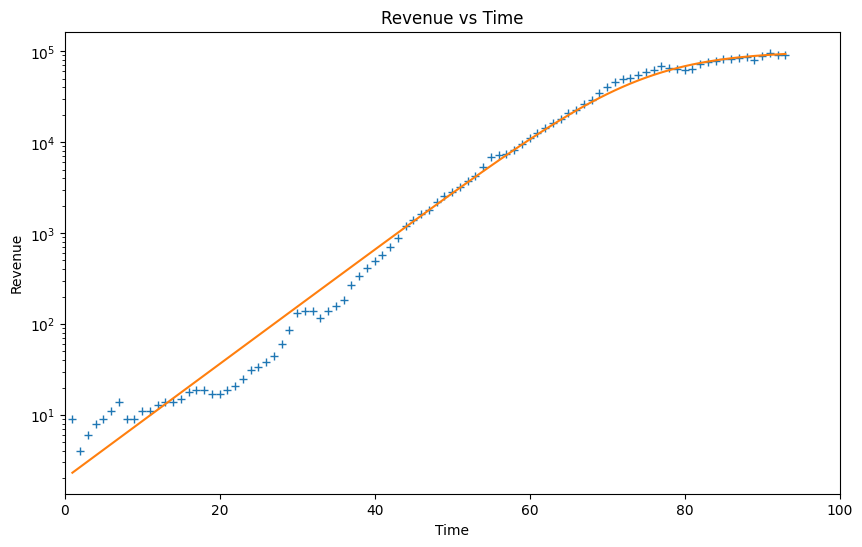

In [4]:
r_val = logistic_function(xo = 2, a = 0.145, k = 1e5, t = time)
plt.figure(figsize=(10, 6))
plt.plot(time, revenue, '+')
plt.plot(time, r_val)
plt.xlim(0 , 100)
plt.yscale('log')
plt.ylabel('Revenue')
plt.xlabel('Time')
plt.title('Revenue vs Time')
plt.show()

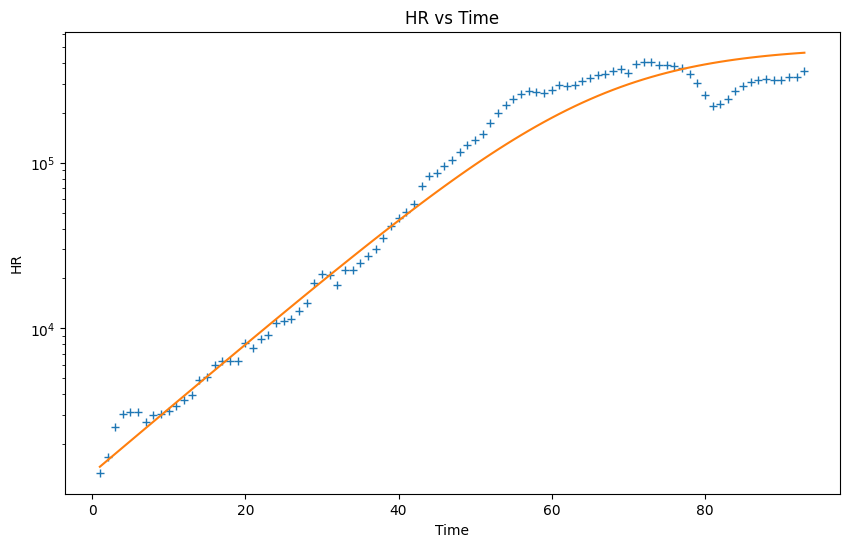

In [5]:
hr_val = logistic_function(xo = 1337, a = 0.09, k = 500000, t = time)
plt.figure(figsize=(10, 6))
plt.plot(time, hr, '+')
plt.plot(time, hr_val)
plt.yscale('log')
plt.ylabel('HR')
plt.xlabel('Time')
plt.title('HR vs Time')
plt.show()

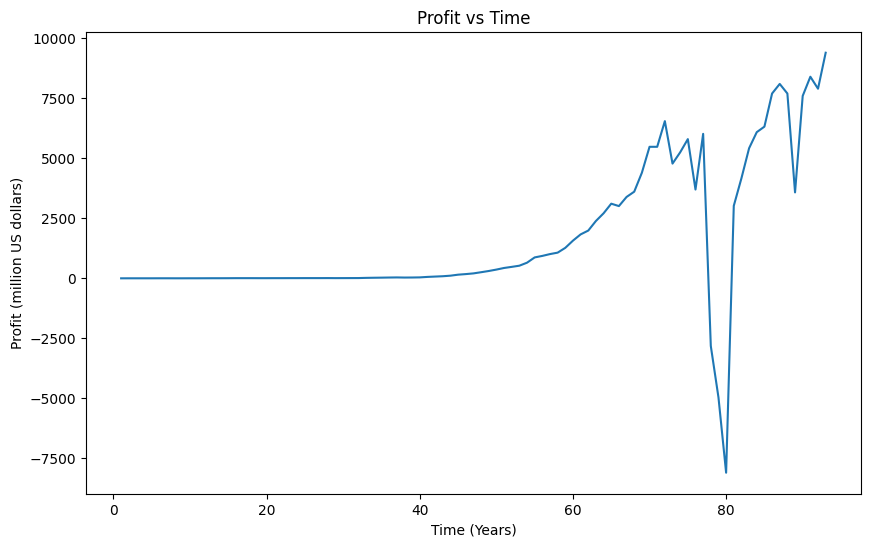

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(time, profit)
plt.ylabel('Profit (million US dollars)')
plt.xlabel('Time (Years)')
plt.title('Profit vs Time')
plt.show()

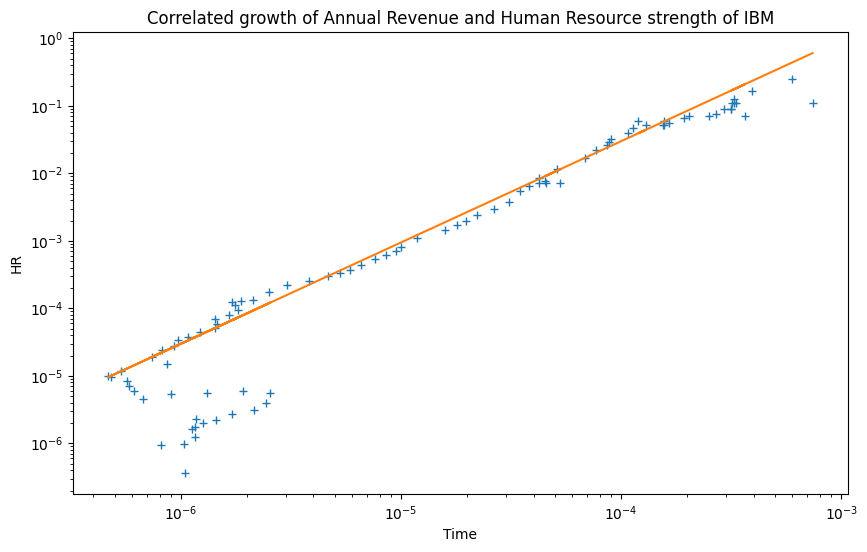

In [7]:
u = power_law_function(x = hr, k = 500000)
v = power_law_function(x = revenue, k = 1e05)
v_val = 3* 1e4 * power_law(u , 1.5)

plt.figure(figsize=(10, 6))
plt.plot(u,v,'+')
plt.plot(u,v_val)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('HR')
plt.xlabel('Time')
plt.title('Correlated growth of Annual Revenue and Human Resource strength of IBM')
plt.show()

<h4> <b> Statistical Analysis

In [8]:
mu_r = calc_mu(real = revenue, pred = r_val)
std_r = calc_std(real = revenue, pred = r_val)
mu_h = calc_mu(real = hr, pred = hr_val)
std_h = calc_std(real = hr, pred = hr_val)

print(f'Relative mean of Revenue mu_R = {mu_r}')
print(f'Relative Standard Deviation of Revenue std_R = {std_r}')
print(f'Relative mean of HR mu_H = {mu_h}')
print(f'Relative Standard Deviation of HR std_H = {std_h}')

Relative mean of Revenue mu_R = 0.024998404862919595
Relative Standard Deviation of Revenue std_R = 0.48704047134413464
Relative mean of HR mu_H = 0.09533329852464709
Relative Standard Deviation of HR std_H = 0.29981118245413896
